In [20]:
import random
import warnings
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

warnings.filterwarnings("ignore")
import networkx as nx
from dowhy.utils import plot
from dowhy import gcm, CausalModel

import matplotlib.pyplot as plt
import json


#### Asia / chest clinic bayesian network

In [2]:
dataset = pd.read_csv('../data/asia10K.csv')
dataset.head()

,smoke,lung,asia,tub,either,xray,bronc,dysp
0,yes,yes,no,no,yes,yes,yes,yes
1,no,no,no,no,no,yes,yes,yes
2,no,no,no,no,no,no,yes,yes
3,no,no,no,no,no,no,yes,yes
4,yes,no,no,no,no,no,yes,no


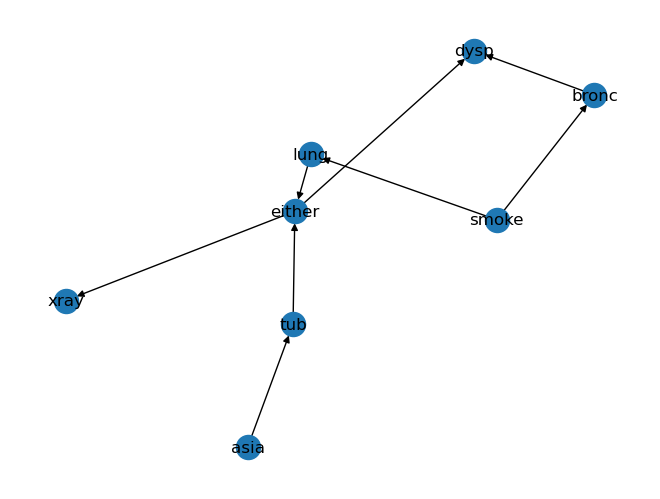

In [21]:
G = nx.DiGraph()

G.add_nodes_from(["asia", "smoke", "tub", "lung", "bronc", "either", "xray", "dysp"])

edges = [
    # tuple of direction (from, to)
    ("asia", "tub"),
    ("smoke", "lung"),
    ("smoke", "bronc"),
    ("tub", "either"),
    ("lung", "either"),
    ("either", "xray"),
    ("either", "dysp"),
    ("bronc", "dysp"),
]


G.add_edges_from(edges)
nx.write_gml(G, "asia_network.gml")

nx.draw(G, with_labels=True)
plt.plot()

In [22]:
graph_dict = nx.readwrite.json_graph.node_link_data(G)
graph_json = json.dumps(graph_dict)

In [27]:
model = CausalModel(
    data=dataset,
    treatment='smoke',
    outcome='lung',
    graph="asia_network.gml"  # Specify the path to the GML file
)

In [ ]:
identified_estimand = model.identify_effect()